# Treball <code> Python </code>
##### Nom: Jose Calatayud Mateu
##### NIU: 1630376
## Renda disponible de les llars de la ciutat de Barcelona per càpita
### (a) Introducció i importació de taules

Cadascuna de les taules són la renda disponible de les llars de la ciutat de Barcelona, per barris, per càpita en els anys 2015, 2016, 2017 i 2018.

L'objectiu serà juntar aquestes taules per tal de tindre en un mateix dataframe la renda disponible per càpita en cada uns dels anys diferents per barris.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [38]:
url_renda18 = "https://opendata-ajuntament.barcelona.cat/data/dataset/78db0c75-fa56-4604-9510-8b92834a7fd2/resource/34ededd1-6271-4b9b-bac9-18a3fc264a48/download/2018_renda_disponible_llars.csv"
url_renda17 = "https://opendata-ajuntament.barcelona.cat/data/dataset/78db0c75-fa56-4604-9510-8b92834a7fd2/resource/f11301eb-5210-4e61-b6e4-b0837f8309dc/download/2017_renda_disponible_llars.csv"
url_renda16 = "https://opendata-ajuntament.barcelona.cat/data/dataset/78db0c75-fa56-4604-9510-8b92834a7fd2/resource/c4ea1ca7-c2d4-440f-82c0-e3c713e8e3fc/download/2016_renda_disponible_llars.csv"
url_renda15 = "https://opendata-ajuntament.barcelona.cat/data/dataset/78db0c75-fa56-4604-9510-8b92834a7fd2/resource/bb7040fe-608a-41f2-b1d9-bf126392e08a/download/2015_renda_disponible_llars.csv"

In [39]:
renda15=pd.read_csv(url_renda15,sep=',')
renda16=pd.read_csv(url_renda16,sep=',')
renda17=pd.read_csv(url_renda17,sep=',')
renda18=pd.read_csv(url_renda18,sep=',')
print(renda15,renda16,renda17,renda18) 

     Any  Codi_Districte Nom_Districte  Codi_Barri  \
0   2015               1  Ciutat Vella           1   
1   2015               1  Ciutat Vella           2   
2   2015               1  Ciutat Vella           3   
3   2015               1  Ciutat Vella           4   
4   2015               2      Eixample           5   
..   ...             ...           ...         ...   
68  2015              10    Sant Martí          69   
69  2015              10    Sant Martí          70   
70  2015              10    Sant Martí          71   
71  2015              10    Sant Martí          72   
72  2015              10    Sant Martí          73   

                                       Nom_Barri  Import_€_Any  
0                                       el Raval         10896  
1                                 el Barri Gòtic         14456  
2                                 la Barceloneta         14714  
3          Sant Pere, Santa Caterina i la Ribera         15154  
4                         

#### (b) Ajuntar taules

En primer lloc, es tractarà de formar un dataframe global que incloga les rentes des de 2015 fins 2018 per barris amb els seues respectives rendes. Després, s'utilitzarà la funció <code>desglo</code> per tal de crear noves taules separar-la per anys (que ja és el que tenim) i crear files per anys amb la funció <code>merge</code>. 

Però abans, es tindrà que crear una funció <code>uniser</code> que consistirà en la creació d'una nova amb la concadenació de les donades, és a dir, unió de sèries (on el seu argument és una llista de sèries);

In [40]:
def uniser(x):
    l=pd.Series([])
    for i in range(len(x)):
        l=l.append(x[i],ignore_index=True)
    return(l)

In [41]:
renda_global=pd.DataFrame({'Any':uniser([renda15['Any'],renda16['Any'],renda17['Any'],renda18['Any']]),
                          'Codi_Districte':uniser([renda15['Codi_Districte'],renda16['Codi_Districte'],renda17['Codi_Districte'],renda18['Codi_Districte']]),
                          'Nom_Districte':uniser([renda15['Nom_Districte'],renda16['Nom_Districte'],renda17['Nom_Districte'],renda18['Nom_Districte']]),
                          'Codi_Barri':uniser([renda15['Codi_Barri'],renda16['Codi_Barri'],renda17['Codi_Barri'],renda18['Codi_Barri']]),
                          'Nom_Barri':uniser([renda15['Nom_Barri'],renda16['Nom_Barri'],renda17['Nom_Barri'],renda18['Nom_Barri']]),
                          'Import_€_Any':uniser([renda15['Import_€_Any'],renda16['Import_€_Any'],renda17['Import_€_Any'],renda18['Import_€_Any']])})
print(renda_global)

      Any  Codi_Districte Nom_Districte  Codi_Barri  \
0    2015               1  Ciutat Vella           1   
1    2015               1  Ciutat Vella           2   
2    2015               1  Ciutat Vella           3   
3    2015               1  Ciutat Vella           4   
4    2015               2      Eixample           5   
..    ...             ...           ...         ...   
287  2018              10    Sant Martí          69   
288  2018              10    Sant Martí          70   
289  2018              10    Sant Martí          71   
290  2018              10    Sant Martí          72   
291  2018              10    Sant Martí          73   

                                        Nom_Barri  Import_€_Any  
0                                        el Raval         10896  
1                                  el Barri Gòtic         14456  
2                                  la Barceloneta         14714  
3           Sant Pere, Santa Caterina i la Ribera         15154  
4        

In [42]:
def desglo(dataframe,Sexe,Contador,Punt_unio):
    x=dataframe[Sexe].unique()
    
    var_base=dataframe[dataframe[Sexe]==x[0]]
    var1=dataframe[dataframe[Sexe]==x[1]]
            
    del var_base[Sexe]
    del var1[Sexe]
            
    var_base=var_base.rename(columns={Contador:x[0]})
    var1=var1.rename(columns={Contador:x[1]})
            
    var1=var1[[Punt_unio,x[1]]]
            
    taula=pd.merge(var_base, var1, on=Punt_unio)
    
    for i in range(2,len(x)):
            var2=dataframe[dataframe[Sexe]==x[i]]
            del var2[Sexe]
            var2=var2.rename(columns={Contador:x[i]})
            var2=var2[[Punt_unio,x[i]]]
            aux_taula=pd.DataFrame.copy(taula)
            taula=pd.merge(aux_taula,var2, on=Punt_unio)
    return(taula)

La funció desglo es correspon amb la demanada en l'exercici 1.3.1 de la Pràctica 5 de Python. És una funció encarregada se separar una taula en subtaules per després ajuntar-les tenint en compte que cadascuna té un punt d'unió (per a poder aplicar merge). Tenint açò en compte, es procedirà a calcular la taula ajuntada (on les columnes amb la data de l'any es correspon a l'import en euros de la renda disponible de les llars en eixe any);

In [43]:
renda_unif=desglo(renda_global,'Any','Import_€_Any','Codi_Barri'); renda_unif

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,2015,2016,2017,2018
0,1,Ciutat Vella,1,el Raval,10896,10980,11407,12351
1,1,Ciutat Vella,2,el Barri Gòtic,14456,14411,14766,14598
2,1,Ciutat Vella,3,la Barceloneta,14714,14618,15064,16271
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",15154,15930,16461,17803
4,2,Eixample,5,el Fort Pienc,20817,21374,21495,21890
...,...,...,...,...,...,...,...,...
68,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,23274,24150,23277,24081
69,10,Sant Martí,70,el Besòs i el Maresme,12474,12392,12433,12981
70,10,Sant Martí,71,Provençals del Poblenou,18642,19201,19199,19975
71,10,Sant Martí,72,Sant Martí de Provençals,17613,17821,17766,18447


In [44]:
renda_unif.to_csv('Renda.csv',quotechar=' ')

#### (c) Gràfiques
Abans de graficar, hi ha que entendre que signifiquen les dades d'aquest taula. Per exemple, a l'any 2015 la renda disponible d'un individu del barri 'el Raval' era de 10896€ de mitjana, és a dir, és la raò entre la renda total d'aquest barri en 2015 i la seua població enpadronada. 

Aleshores, no seria correcte sumar totes les files de l'any 2015 i dividir-la pel nombre de files, i dir que aquesta seria la renda per capita de la ciutat de Barcelona. El que s'hauria de fer seria, ponderar cadascuna d'aquestes rendes per capita de cada barri pel nombre d'habitants del barri, sumar-ho i dividir-ho pel nombre d'habitants totals de Barcelona. Açò sí que ens donaria la renda per capita de Barcelona en eixe any. 

Sense cap tipus de manipulació es podria fer, per exemple, la gràfica de l'evolució de la renda disponible d'un individu del barri 'el Raval' durant els anys;

In [45]:
help(pd.DataFrame.sub)

Help on function sub in module pandas.core.ops:

sub(self, other, axis='columns', level=None, fill_value=None)
    Get Subtraction of dataframe and other, element-wise (binary operator `sub`).
    
    Equivalent to ``dataframe - other``, but with support to substitute a fill_value
    for missing data in one of the inputs. With reverse version, `rsub`.
    
    Among flexible wrappers (`add`, `sub`, `mul`, `div`, `mod`, `pow`) to
    arithmetic operators: `+`, `-`, `*`, `/`, `//`, `%`, `**`.
    
    Parameters
    ----------
    other : scalar, sequence, Series, or DataFrame
        Any single or multiple element data structure, or list-like object.
    axis : {0 or 'index', 1 or 'columns'}
        Whether to compare by the index (0 or 'index') or columns
        (1 or 'columns'). For Series input, axis to match Series index on.
    level : int or label
        Broadcast across a level, matching Index values on the
        passed MultiIndex level.
    fill_value : float or None, defa

In [46]:
x1=np.array(['2015','2016','2017','2018'])
y1=np.array([renda_unif[2015][0],renda_unif[2016][0],renda_unif[2017][0],renda_unif[2018][0]])

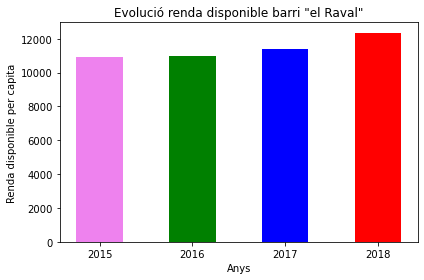

In [47]:
index=np.arange(4)
amplada=0.5
colors=['violet','green','blue','red']

barplot=plt.bar(index,y1,amplada,color=colors)

plt.ylabel('Renda disponible per capita')
plt.xlabel('Anys')
plt.title('Evolució renda disponible barri "el Raval"')
plt.xticks(index, x1)
plt.tight_layout()
plt.show()

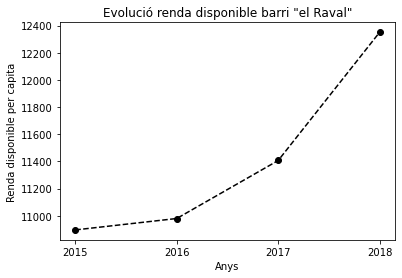

In [48]:
plt.plot(index,y1,color='black', marker='o', linestyle='dashed')

plt.xticks(index,x1)
plt.ylabel('Renda disponible per capita')
plt.xlabel('Anys')
plt.title('Evolució renda disponible barri "el Raval"')
plt.show()

Aquest últim gràfic reflecteix molt bé com ha sigut l'evolució de la renda disponible al barri de "el Raval", on s'observa una clar increment de la seua renda disponible al llarg dels anys. Ara es veurà un altre cas que presenta més fluctuacions, és el cas del barri "la Vall d'Hebron";

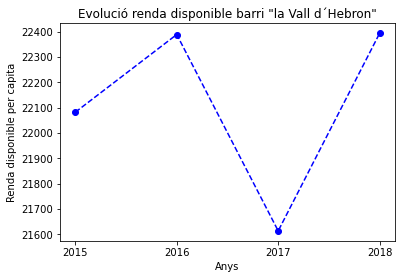

In [49]:
y2=np.array([renda_unif[2015][40],renda_unif[2016][40],renda_unif[2017][40],renda_unif[2018][40]])

plt.plot(index,y2,color='b', marker='o', linestyle='dashed',scaley=True)

plt.xticks(index,x1)
plt.ylabel('Renda disponible per capita')
plt.xlabel('Anys')
plt.title('Evolució renda disponible barri "la Vall d´Hebron"')
plt.show()

#### (d) Estadístiques

Les dades proporcionades per la taula no son sufients per poder realitzar unes estadístiques correctes, ja que les dades obtingudes són rendes per capita i no es pot calcular mitjanes ni desviacions degut a que la població en cadascún dels barris és diferent. Aleshores, hi ha que obtindre les dades poblacionals de cada barri per tal de poder elaborar un dataframe que contingui la renda real total de cada barri i aixina SÍ que es podran calcular estadístics.

In [50]:
url_padro15 = "https://opendata-ajuntament.barcelona.cat/data/dataset/56568d9d-651a-49ff-bbc8-52d3fcee4421/resource/301c14bf-1097-4003-860b-da9ad027eb2b/download/2015_padro_ocupacio_mitjana.csv"
url_padro16 = "https://opendata-ajuntament.barcelona.cat/data/dataset/56568d9d-651a-49ff-bbc8-52d3fcee4421/resource/09026d72-aed9-444d-b0bd-5f92c81ece07/download/2016_padro_ocupacio_mitjana.csv"
url_padro17 = "https://opendata-ajuntament.barcelona.cat/data/dataset/56568d9d-651a-49ff-bbc8-52d3fcee4421/resource/c27464bd-1c3c-4a00-b2f4-2968ad07236e/download/2017_padro_ocupacio_mitjana.csv"
url_padro18 = "https://opendata-ajuntament.barcelona.cat/data/dataset/56568d9d-651a-49ff-bbc8-52d3fcee4421/resource/fb4f3e52-8997-4cc0-80be-bebbd850354d/download/2018_padro_ocupacio_mitjana.csv"

In [51]:
padro15=pd.read_csv(url_padro15,sep=',')
padro16=pd.read_csv(url_padro16,sep=',')
padro17=pd.read_csv(url_padro17,sep=',')
padro18=pd.read_csv(url_padro18,sep=',')
print(padro15,padro16,padro17,padro18) 

     Any  Codi_Districte Nom_Districte  Codi_Barri  \
0   2015               1  Ciutat Vella           1   
1   2015               1  Ciutat Vella           2   
2   2015               1  Ciutat Vella           3   
3   2015               1  Ciutat Vella           4   
4   2015               2      Eixample           5   
..   ...             ...           ...         ...   
69  2015              10    Sant Martí          70   
70  2015              10    Sant Martí          71   
71  2015              10    Sant Martí          72   
72  2015              10    Sant Martí          73   
73  2015              99     No consta          99   

                                Nom_Barri  Poblacio  Domicilis  \
0                                el Raval     47617      16776   
1                          el Barri Gòtic     15269       6461   
2                          la Barceloneta     15036       6820   
3   Sant Pere, Santa Caterina i la Ribera     22305       9869   
4                    

In [52]:
padro=pd.DataFrame({'Any':uniser([padro15['Any'],padro16['Any'],padro17['Any'],padro18['Any']]),
                    'Codi_Districte':uniser([padro15['Codi_Districte'],padro16['Codi_Districte'],padro17['Codi_Districte'],padro18['Codi_Districte']]),
                    'Nom_Districte':uniser([padro15['Nom_Districte'],padro16['Nom_Districte'],padro17['Nom_Districte'],padro18['Nom_Districte']]),
                    'Codi_Barri':uniser([padro15['Codi_Barri'],padro16['Codi_Barri'],padro17['Codi_Barri'],padro18['Codi_Barri']]),
                    'Nom_Barri':uniser([padro15['Nom_Barri'],padro16['Nom_Barri'],padro17['Nom_Barri'],padro18['Nom_Barri']]),
                    'Poblacio':uniser([padro15['Poblacio'],padro16['Poblacio'],padro17['Poblacio'],padro18['Poblacio']])})
padro

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Poblacio
0,2015,1,Ciutat Vella,1,el Raval,47617
1,2015,1,Ciutat Vella,2,el Barri Gòtic,15269
2,2015,1,Ciutat Vella,3,la Barceloneta,15036
3,2015,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22305
4,2015,2,Eixample,5,el Fort Pienc,31645
...,...,...,...,...,...,...
288,2018,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,13681
289,2018,10,Sant Martí,70,el Besòs i el Maresme,23546
290,2018,10,Sant Martí,71,Provençals del Poblenou,20766
291,2018,10,Sant Martí,72,Sant Martí de Provençals,26092


In [53]:
padro=padro.drop([73],axis=0); padro

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Poblacio
0,2015,1,Ciutat Vella,1,el Raval,47617
1,2015,1,Ciutat Vella,2,el Barri Gòtic,15269
2,2015,1,Ciutat Vella,3,la Barceloneta,15036
3,2015,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22305
4,2015,2,Eixample,5,el Fort Pienc,31645
...,...,...,...,...,...,...
288,2018,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,13681
289,2018,10,Sant Martí,70,el Besòs i el Maresme,23546
290,2018,10,Sant Martí,71,Provençals del Poblenou,20766
291,2018,10,Sant Martí,72,Sant Martí de Provençals,26092


In [54]:
padro_unif=desglo(padro,'Any','Poblacio','Codi_Barri'); padro_unif

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,2015,2016,2017,2018
0,1,Ciutat Vella,1,el Raval,47617,47274,47986,47605
1,1,Ciutat Vella,2,el Barri Gòtic,15269,15729,16240,17035
2,1,Ciutat Vella,3,la Barceloneta,15036,15068,15101,14893
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22305,22380,22923,22605
4,2,Eixample,5,el Fort Pienc,31645,31693,32048,32080
...,...,...,...,...,...,...,...,...
68,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,13352,13455,13710,13681
69,10,Sant Martí,70,el Besòs i el Maresme,23026,22609,22893,23546
70,10,Sant Martí,71,Provençals del Poblenou,20244,20516,20649,20766
71,10,Sant Martí,72,Sant Martí de Provençals,26005,26031,26187,26092


Població total en la ciutat de Barcelona en els seus respectius anys (fixeu-vos que la població ha anat incrementant al llarg dels anys):

In [55]:
poblacio_bcn=np.sum(padro_unif[list(range(2015,2019))], axis=0); poblacio_bcn

2015    1609549
2016    1610427
2017    1625137
2018    1628936
dtype: int64

Ara es calcularan les rentes que corresponen a cada barri en cada any multiplicant la renda per capita de cada un d'aquests pel nombre de població que hi correspon, obtenint així la renda total generada per les llars de cada barri (que si es sumen tots els barris s'obté la renta total de la ciutat de Barcelona en eixe any):

In [56]:
renda_total=pd.DataFrame.copy(renda_unif); renda_total

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,2015,2016,2017,2018
0,1,Ciutat Vella,1,el Raval,10896,10980,11407,12351
1,1,Ciutat Vella,2,el Barri Gòtic,14456,14411,14766,14598
2,1,Ciutat Vella,3,la Barceloneta,14714,14618,15064,16271
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",15154,15930,16461,17803
4,2,Eixample,5,el Fort Pienc,20817,21374,21495,21890
...,...,...,...,...,...,...,...,...
68,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,23274,24150,23277,24081
69,10,Sant Martí,70,el Besòs i el Maresme,12474,12392,12433,12981
70,10,Sant Martí,71,Provençals del Poblenou,18642,19201,19199,19975
71,10,Sant Martí,72,Sant Martí de Provençals,17613,17821,17766,18447


In [57]:
renda_total[list(range(2015,2019))]=renda_total[list(range(2015,2019))]*padro_unif[list(range(2015,2019))]
renda_total

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,2015,2016,2017,2018
0,1,Ciutat Vella,1,el Raval,518834832,519068520,547376302,587969355
1,1,Ciutat Vella,2,el Barri Gòtic,220728664,226670619,239799840,248676930
2,1,Ciutat Vella,3,la Barceloneta,221239704,220264024,227481464,242324003
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",338009970,356513400,377335503,402436815
4,2,Eixample,5,el Fort Pienc,658753965,677406182,688871760,702231200
...,...,...,...,...,...,...,...,...
68,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,310754448,324938250,319127670,329452161
69,10,Sant Martí,70,el Besòs i el Maresme,287226324,280170728,284628669,305650626
70,10,Sant Martí,71,Provençals del Poblenou,377388648,393927716,396440151,414800850
71,10,Sant Martí,72,Sant Martí de Provençals,458026065,463898451,465238242,481319124


2015    32275577612
2016    33387580889
2017    34055094590
2018    34996051724
dtype: int64


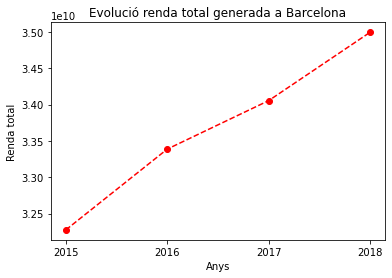

In [58]:
renda_bcn=np.sum(renda_total[[2015,2016,2017,2018]],axis=0); print(renda_bcn)

plt.plot(index,renda_bcn,'ro--')
plt.xticks(index,x1)
plt.ylabel('Renda total')
plt.xlabel('Anys')
plt.title('Evolució renda total generada a Barcelona')
plt.show()

Es veu que la renda que genera Barcelona ha incementat al llarg del temps. Amb els resultats dels dos sumaris ara sí es pot calcular quina es la renda per capita de la ciutat de Barcelona en cada any, ja que ara s'ha fet ponderacions pels habitants de cada barri.

In [59]:
renda_per_capita=renda_bcn/poblacio_bcn; renda_per_capita

2015    20052.559824
2016    20732.129360
2017    20955.214600
2018    21483.994291
dtype: float64

Aquesta renda per càpita és com si fos la renda mitjana d'un habitant a la ciutat de BCN, ja que s'ha multiplicat la renda mitjana de cada barri pel seu nombre d'habitants i després s'han sumat la de totos els barris i s'ha dividit pel nombre total d'individus, desfent així qualsevol desigualtat en el nombre d'habitant de cada barri. (L'error estaria en no tindre en compte que cada barri pondera de diferente manera a la renta global ja que depen de la quantitats de persones que hi habiten)

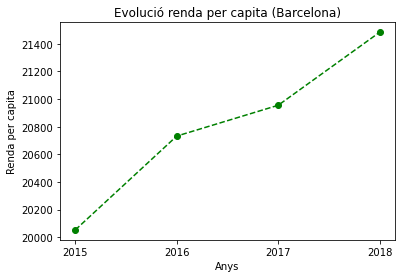

In [60]:
plt.plot(index,renda_per_capita,'go--')
plt.xticks(index,x1)
plt.ylabel('Renda per capita')
plt.xlabel('Anys')
plt.title('Evolució renda per capita (Barcelona)')
plt.show()

Sense manipular les dades de la taula original (renda_unif), també es poden calcular estadístiques com; quina es la mitjana de la renta per capita de cada barri (i un cop es sap, quin barri es el més ric)o quin barri presenta menys fluctuacions de renda. ATENCIÓ: Açò no es correcte, es necessita la taula padro_unif per tal de fer-ho coherent, és a dir, com s'ha explicat anteriorment no es pot sumar dels rendes mitjanes de cada any i dividir per nombre d'anys 

A continuació es mostra una forma correcta d'obtindre estadístiques sobre les rendes dels barris:

In [61]:
renmit_barri=pd.DataFrame({'Nom_Barri':renda_total['Nom_Barri'],
                          'Mitjana.15_18':np.mean(renda_total[[2015,2016,2017,2018]]/padro_unif[[2015,2016,2017,2018]],axis=1),
                          'Desvia.15_18':np.std(renda_total[[2015,2016,2017,2018]]/padro_unif[[2015,2016,2017,2018]],axis=1)})
renmit_barri

,Nom_Barri,Mitjana.15_18,Desvia.15_18
0,el Raval,11408.50,577.619468
1,el Barri Gòtic,14557.75,138.633284
2,la Barceloneta,15166.75,658.793357
3,"Sant Pere, Santa Caterina i la Ribera",16337.00,965.617678
4,el Fort Pienc,21394.00,383.909495
...,...,...,...
68,Diagonal Mar i el Front Marítim del Poblenou,23695.50,420.709223
69,el Besòs i el Maresme,12570.00,239.055433
70,Provençals del Poblenou,19254.25,474.399291
71,Sant Martí de Provençals,17911.75,318.285544


In [62]:
renmit_barri.to_csv('renmit_barri.csv',quotechar=' ')

In [63]:
renmit_barri.loc[[0]]

,Nom_Barri,Mitjana.15_18,Desvia.15_18
0,el Raval,11408.5,577.619468


In [64]:
type(renmit_barri['Mitjana.15_18'])

pandas.core.series.Series

In [65]:
renmit_barri['Mitjana.15_18'].idxmax()

23

In [66]:
a1=renmit_barri['Mitjana.15_18'].idxmax()
a2=renmit_barri['Mitjana.15_18'].idxmin()
a3=renmit_barri['Desvia.15_18'].idxmax()
a4=renmit_barri['Desvia.15_18'].idxmin()

br_max=renmit_barri.loc[[a1]]
br_min=renmit_barri.loc[[a2]]
bd_max=renmit_barri.loc[[a3]]
bd_min=renmit_barri.loc[[a4]]

In [67]:
print('La renta més alta, en mitjana, durant el periode 2015-2018 és de',
      br_max['Mitjana.15_18'][a1],'€ que correspon al barri "', br_max['Nom_Barri'][a1],'".')

print('La renta més petita, en mitjana, durant el periode 2015-2018 és de',
      br_min['Mitjana.15_18'][a2],'€ que correspon al barri "', br_min['Nom_Barri'][a2],'".')

La renta més alta, en mitjana, durant el periode 2015-2018 és de 37029.75 € que correspon al barri " les Tres Torres ".
La renta més petita, en mitjana, durant el periode 2015-2018 és de 10644.25 € que correspon al barri " Ciutat Meridiana ".


In [68]:
print('El barri que presenta una major estabilitat, és a dir, menors flucutacions en la seua renta durant el periode 2015-2018 és "',
      bd_min['Nom_Barri'][a4],'"amb una desviació mitjana de ', round(bd_min['Desvia.15_18'][a4],2),'€')

print('El barri que presenta una menor estabilitat, és a dir, majors flucutacions en la seua renta durant el periode 2015-2018 és "',
      bd_max['Nom_Barri'][a3],'"amb una desviació mitjana de ', round(bd_max['Desvia.15_18'][a3],2),'€')

El barri que presenta una major estabilitat, és a dir, menors flucutacions en la seua renta durant el periode 2015-2018 és " el Barri Gòtic "amb una desviació mitjana de  138.63 €
El barri que presenta una menor estabilitat, és a dir, majors flucutacions en la seua renta durant el periode 2015-2018 és " les Tres Torres "amb una desviació mitjana de  1842.29 €
